In [1]:
using DSP, FFTW

In [2]:
sweep(t,t₀,t₁,f₀,f₁) = (t₀ < t < t₁) ? sin(2π*(t-t₀)*(f₀ + 0.5*(f₁ - f₀)/(t₁ - t₀)*(t - t₀))) : 0.0

sweep (generic function with 1 method)

In [3]:
Δt = 0.004  # sample period (s)
n = 500
t = 0:Δt:(n-1)*Δt
nl = [0.05, 0.0]  # 5% noise level and noise-free
ϵ = 0.1;   # white noise for deconvolution

In [4]:
s1 = [sweep.(t,0.5,1.5,8.,64.) .+ nl*(2*rand(n) .- 1) for nl in nl];   # add random noise
s2 = [sweep.(t,0.,0.5,8.,36.)  .+ nl*(2*rand(n) .- 1) for nl in nl];   # add random noise

In [5]:
xₛₛ = [xcorr(s1,s2)[n:end] for (s1,s2) in zip(s1,s2)];   # xcorr's length = 2*n - 1, cut to length n

In [6]:
f = LinRange(-0.5/Δt, 0.5/Δt, n+1)[n÷2+1:end]
𝑆₁ = fft.(s1);   𝑆₁a = [fftshift(abs.(𝑆₁))[n÷2:end] for 𝑆₁ in 𝑆₁];
𝑆₂ = fft.(s2);   𝑆₂a = [fftshift(abs.(𝑆₂))[n÷2:end] for 𝑆₂ in 𝑆₂];
𝑋ᵪ = fft.(xₛₛ);   𝑋ᵪa = [fftshift(abs.(𝑋ᵪ))[n÷2:end] for 𝑋ᵪ in 𝑋ᵪ];

In [13]:
# deconvolve 𝑋ᵪ for 𝑆₂
𝑆₂_decon =  [@. conj(𝑋ᵪ)*𝑆₁ / (𝑆₁*conj(𝑆₁) + ϵ^2) for (𝑆₁,𝑋ᵪ) in zip(𝑆₁,𝑋ᵪ)];
𝑆₂a_decon = [fftshift(abs.(𝑆₂_decon))[n÷2:end] for 𝑆₂_decon in 𝑆₂_decon];
𝑆₂_decon = [real(ifft(𝑆₂_decon)) for 𝑆₂_decon in 𝑆₂_decon];

In [14]:
# deconvolve 𝑋ᵪ for 𝑆₁
𝑆₁_decon = [@. 𝑋ᵪ*𝑆₂ / (𝑆₂*conj(𝑆₂) + ϵ^2) for (𝑆₂,𝑋ᵪ) in zip(𝑆₂,𝑋ᵪ)];
𝑆₁a_decon = [fftshift(abs.(𝑆₁_decon))[n÷2:end]  for 𝑆₁_decon in 𝑆₁_decon];
𝑆₁_decon = [real(ifft(𝑆₁_decon)) for 𝑆₁_decon in 𝑆₁_decon];

In [15]:
using Plots

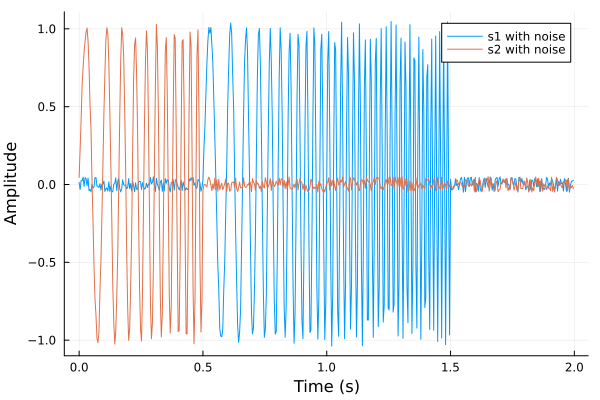

In [16]:
# Plot signals s1 and s2
plot1 = plot(t, s1[1], label="s1 with noise", xlabel="Time (s)", ylabel="Amplitude", legend=:topright)
plot!(t, s2[1], label="s2 with noise")

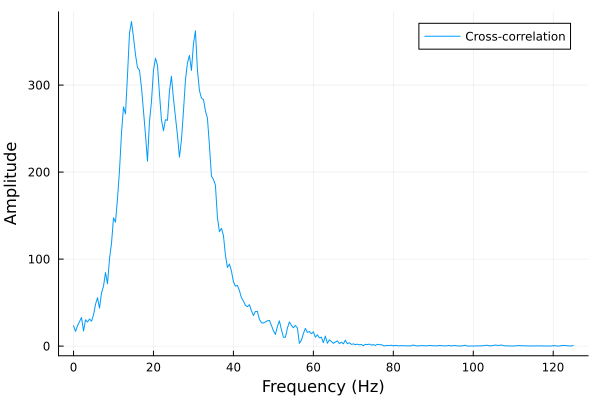

In [17]:
# Plot the cross-correlation 𝑋ᵪ
plot2 = plot(f, 𝑋ᵪa[1], label="Cross-correlation", xlabel="Frequency (Hz)", ylabel="Amplitude", legend=:topright)

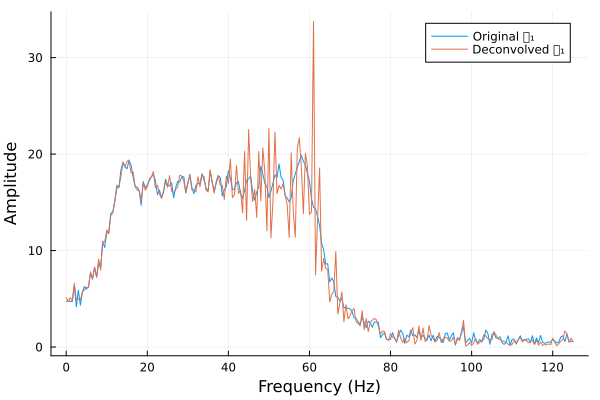

GKS: glyph missing from current font: 119878
GKS: glyph missing from current font: 119878
GKS: glyph missing from current font: 119878
GKS: glyph missing from current font: 119878
GKS: glyph missing from current font: 119878
GKS: glyph missing from current font: 119878
GKS: glyph missing from current font: 119878
GKS: glyph missing from current font: 119878
GKS: glyph missing from current font: 119878
GKS: glyph missing from current font: 119878
GKS: glyph missing from current font: 119878
GKS: glyph missing from current font: 119878
GKS: glyph missing from current font: 119878
GKS: glyph missing from current font: 119878
GKS: glyph missing from current font: 119878
GKS: glyph missing from current font: 119878
GKS: glyph missing from current font: 119878
GKS: glyph missing from current font: 119878


In [18]:
# Plot the deconvolution results for 𝑆₁
plot3 = plot(f, 𝑆₁a[1], label="Original 𝑆₁", xlabel="Frequency (Hz)", ylabel="Amplitude", legend=:topright)
plot!(f, 𝑆₁a_decon[1], label="Deconvolved 𝑆₁")

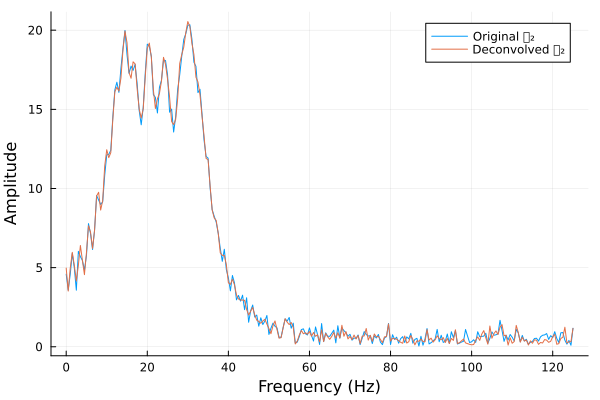

GKS: glyph missing from current font: 119878
GKS: glyph missing from current font: 119878
GKS: glyph missing from current font: 119878
GKS: glyph missing from current font: 119878
GKS: glyph missing from current font: 119878
GKS: glyph missing from current font: 119878
GKS: glyph missing from current font: 119878
GKS: glyph missing from current font: 119878
GKS: glyph missing from current font: 119878
GKS: glyph missing from current font: 119878
GKS: glyph missing from current font: 119878
GKS: glyph missing from current font: 119878
GKS: glyph missing from current font: 119878
GKS: glyph missing from current font: 119878
GKS: glyph missing from current font: 119878
GKS: glyph missing from current font: 119878
GKS: glyph missing from current font: 119878
GKS: glyph missing from current font: 119878


In [19]:
# Plot the deconvolution results for 𝑆₂
plot4 = plot(f, 𝑆₂a[1], label="Original 𝑆₂", xlabel="Frequency (Hz)", ylabel="Amplitude", legend=:topright)
plot!(f, 𝑆₂a_decon[1], label="Deconvolved 𝑆₂")

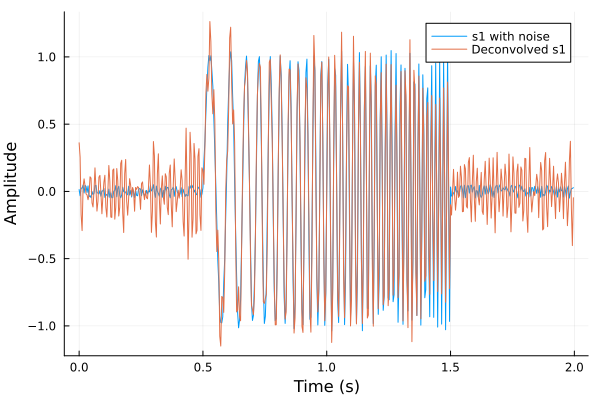

In [20]:
# Plot the deconvolution results in the time domain
plot5 = plot(t, s1[1], label="s1 with noise", xlabel="Time (s)", ylabel="Amplitude", legend=:topright)
plot!(t, 𝑆₁_decon[1], label="Deconvolved s1")

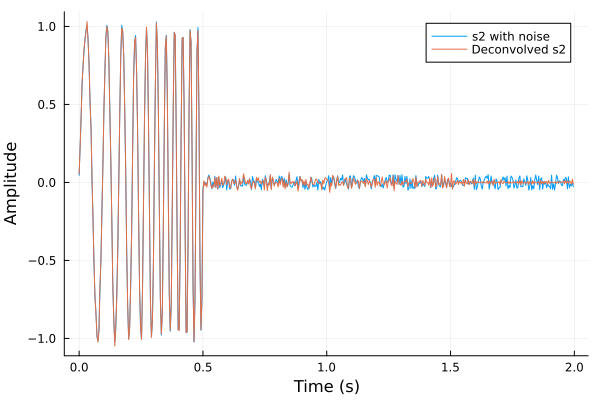

In [21]:
plot6 = plot(t, s2[1], label="s2 with noise", xlabel="Time (s)", ylabel="Amplitude", legend=:topright)
plot!(t, 𝑆₂_decon[1], label="Deconvolved s2")

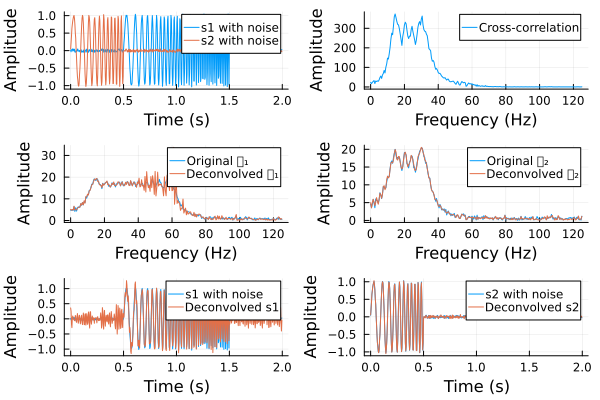

GKS: glyph missing from current font: 119878
GKS: glyph missing from current font: 119878
GKS: glyph missing from current font: 119878
GKS: glyph missing from current font: 119878
GKS: glyph missing from current font: 119878
GKS: glyph missing from current font: 119878
GKS: glyph missing from current font: 119878
GKS: glyph missing from current font: 119878
GKS: glyph missing from current font: 119878
GKS: glyph missing from current font: 119878
GKS: glyph missing from current font: 119878
GKS: glyph missing from current font: 119878
GKS: glyph missing from current font: 119878
GKS: glyph missing from current font: 119878
GKS: glyph missing from current font: 119878
GKS: glyph missing from current font: 119878
GKS: glyph missing from current font: 119878
GKS: glyph missing from current font: 119878
GKS: glyph missing from current font: 119878
GKS: glyph missing from current font: 119878
GKS: glyph missing from current font: 119878
GKS: glyph missing from current font: 119878
GKS: glyph

In [22]:
# Arrange subplots in a grid
plot(plot1, plot2, plot3, plot4, plot5, plot6, layout=(3, 2))

# References
[Inverse of Cross Correlation?](https://discourse.julialang.org/t/inverse-of-cross-correlation/64357)